In [1]:
import os

import torch
import numpy as np
import re
import matplotlib.pyplot as plt
import pickle

import pandas as pd
import seaborn as sns
from ast import literal_eval
from ensemblecalibration.utils.plot_functions import (
    plot_error_analysis,
    read_and_plot_error_analysis,
    read_and_plot_error_analysis_full,
)
from ensemblecalibration.cal_estimates.skce import skce_ul_tensor

### Plot the Type $1$ and Type $2$ error analysis of different experiments:

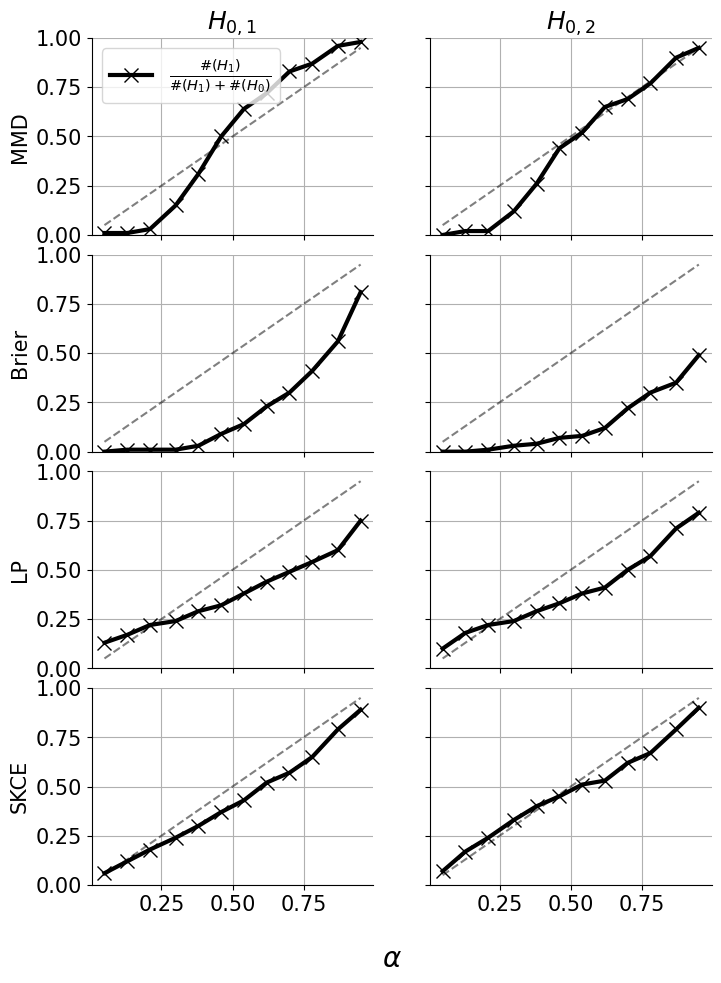

In [2]:
fig = read_and_plot_error_analysis("../results/gp/2024-10-04-00-29-05/h0_results_gp_mlp_1000_reg_100.csv",
                                   save_name="gp_mlp_t1", output_path="../results/gp/2024-10-04-00-29-05/",
                                   figsize=(8,11), list_col_titles=[r"$H_{0,1}$", r"$H_{0,2}$"]) 

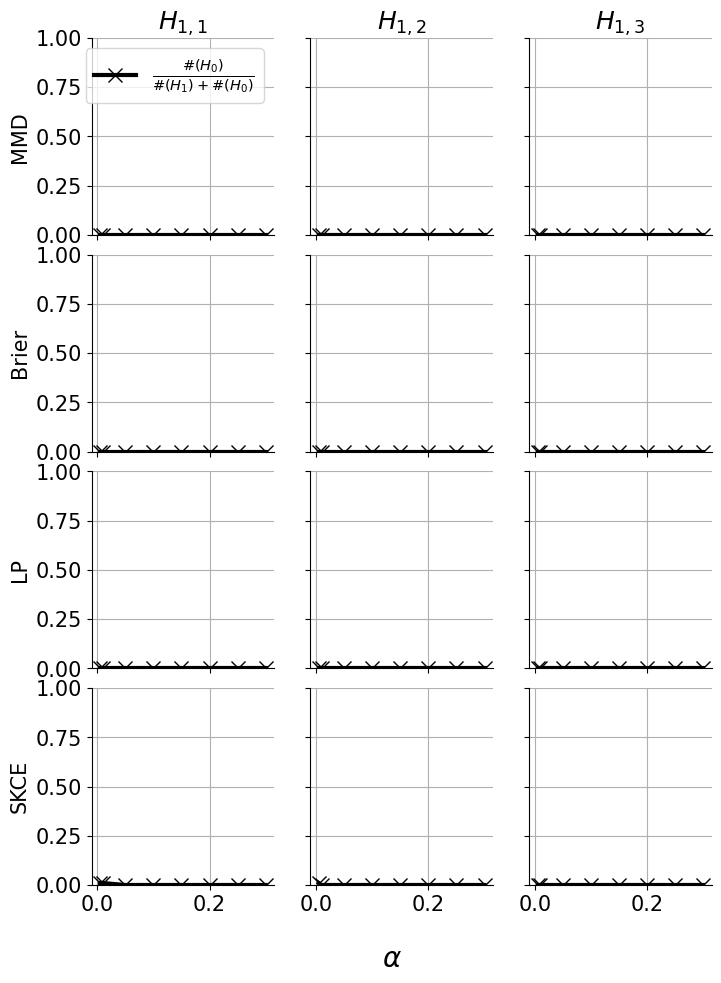

In [3]:
fig = read_and_plot_error_analysis(
    "../results/gp/2024-09-30-16-15-42/h1_results_gp_mlp_100.csv",
    save_name="gp_mlp_reg_t2",
    output_path="../results/gp/2024-09-30-16-15-42/",
    list_col_titles=[
        r"$H_{1,1}$",
        r"$H_{1,2}$",
        r"$H_{1,3}$",
    ],
    alpha=[
        0.005,
        0.01,
        0.05,
        0.1,
        0.15,
        0.2,
        0.25,
        0.3,
    ],
    type_1=False,
    figsize=(8, 11),
)

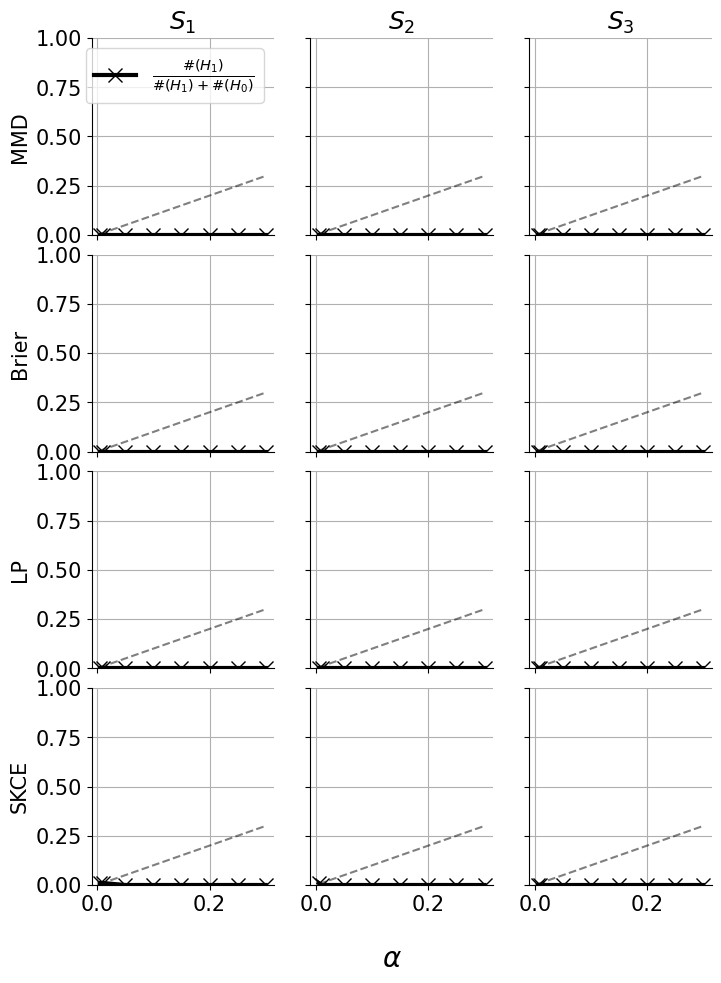

In [4]:
fig = read_and_plot_error_analysis("../results/gp/2024-09-30-16-15-42/h1_results_gp_mlp_100.csv", list_col_titles=[r"$S_1$",
        r"$S_2$",
        r"$S_3$",], 
        alpha=[0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3], save_name="gp_mlp_reg_t2", output_path="../results/gp/2024-09-30-16-15-42/", figsize=(8, 11))

/Users/mirajuergens/Library/CloudStorage/OneDrive-UGent/Code/EnsembleCalibration/ensemblecalibration/utils/helpers.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(clean_and_convert)


(<Figure size 800x1100 with 8 Axes>, <Figure size 800x1100 with 12 Axes>)

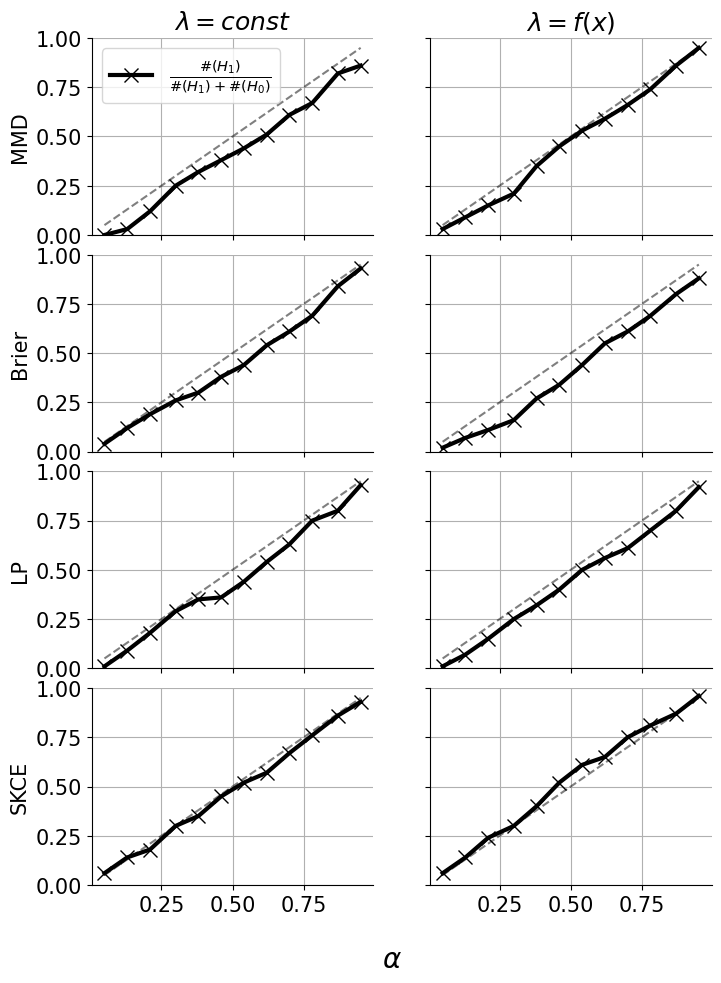

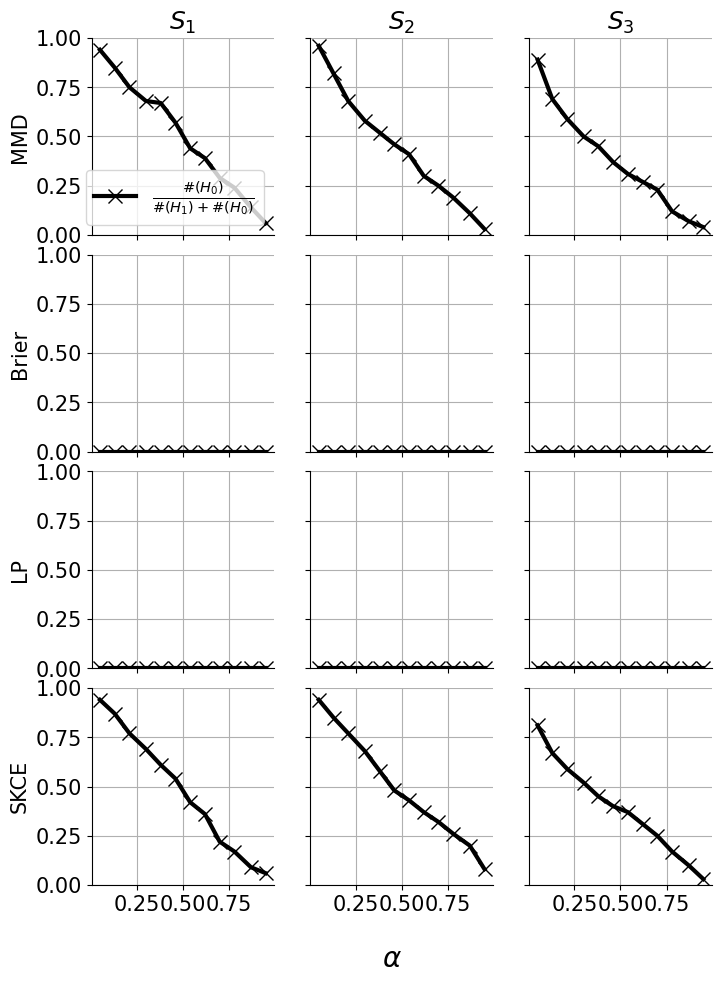

In [6]:
read_and_plot_error_analysis_full(file_path= "../results/dirichlet/2024-09-19-23-33-25/mlp__t1t2_m=10_k=5_mmd_brier_skce_lp_new_100.csv",
                             title_1=None,
                                title_2=None,
                                figsize_1=(8,11),
                                figsize_2=(8,11),
                             output_path= "../results/dirichlet/2024-09-19-23-33-25/",
                             n_type_1=2)

In [32]:
sns.set_palette("viridis")

df_results_mlp_dirichlet_brier = pd.read_csv(
    "../results/dirichlet/2024-08-05-02-07-18/t1t2_brier_dirichlet_100.csv"
)
df_results_mlp_cobyla = pd.read_csv(
    "../results/dirichlet/2024-08-06-14-19-51/t1t2_cobyla_mlp_100.csv"
)

df_results_mlp_dirichlet_brier_new = pd.read_csv(
    "../results/dirichlet/2024-08-09-18-45-53/t1t2_mlp_brier_lp_skce_dirichlet_100.csv"
)

df_results_mlp_new = pd.read_csv(
    "../results/dirichlet/2024-09-11-11-43-10/mlp_t1t2_m=10_k=5_mmd_brier_skce_lp_100.csv")

df_results_slsqp_new = pd.read_csv(
    "../results/dirichlet/2024-09-11-14-17-44/slsqp_t1t2_m=10_k=5_mmd_brier_skce_lp_100.csv")

df_results_slsqp_m_10 = pd.read_csv(
    "../results/dirichlet/2024-09-19-23-39-14/slsqp_t1t2_m=10_k=5_mmd_brier_skce_lp_new_100.csv"
)

df_results_dirichlet_slsqp = pd.read_csv("../results/dirichlet/2024-08-13-16-38-58/t1t2_slsqp_brier_lp_skce_100.csv")

# read the pkl confg file
with open("../results/dirichlet/2024-08-09-18-45-53/config.pkl", "rb") as f:
    config = pickle.load(f)

In [33]:
df_results_mlp_dirichlet_brier_t1 = df_results_mlp_dirichlet_brier.iloc[:2,:3]
df_results_mlp_dirichlet_brier_t2 = df_results_mlp_dirichlet_brier.iloc[2:,:3]

df_results_mlp_cobyla_t1 = df_results_mlp_cobyla.iloc[:2,:3]
df_results_mlp_cobyla_t2 = df_results_mlp_cobyla.iloc[2:,:3]

df_results_mlp_dirichlet_brier_new_t1 = df_results_mlp_dirichlet_brier_new.iloc[:2,:3]
df_results_mlp_dirichlet_brier_new_t2 = df_results_mlp_dirichlet_brier_new.iloc[2:,:3]

df_results_slsqp_t1 = df_results_dirichlet_slsqp.iloc[:2,:3]
df_results_dirichlet_slsqp_t2 = df_results_dirichlet_slsqp.iloc[2:,:3]

df_results_mlp_new_t1 = df_results_mlp_new.iloc[:2,:4]
df_results_mlp_new_t2 = df_results_mlp_new.iloc[2:,:4]

df_results_slsqp_new_t1 = df_results_slsqp_new.iloc[:2,:4]
df_results_slsqp_new_t2 = df_results_slsqp_new.iloc[2:,:4]

df_results_slsqp_m_10_t1 = df_results_slsqp_m_10.iloc[:2,:]
df_results_slsqp_m_10_t2 = df_results_slsqp_m_10.iloc[2:,:]

In [21]:
list_col_titles = [
        "$\lambda=const$",
        "$\lambda=f(x)$",
        "$S_1$",
        "$S_2$",
        "$S_3$",
    ]

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
/var/folders/mf/gnm849bj4fq5xnqhl_bdhf9m0000gn/T/ipykernel_44192/3084936855.py:2: SyntaxWarning: invalid escape sequence '\l'
  "$\lambda=const$",
/var/folders/mf/gnm849bj4fq5xnqhl_bdhf9m0000gn/T/ipykernel_44192/3084936855.py:3: SyntaxWarning: invalid escape sequence '\l'
  "$\lambda=f(x)$",


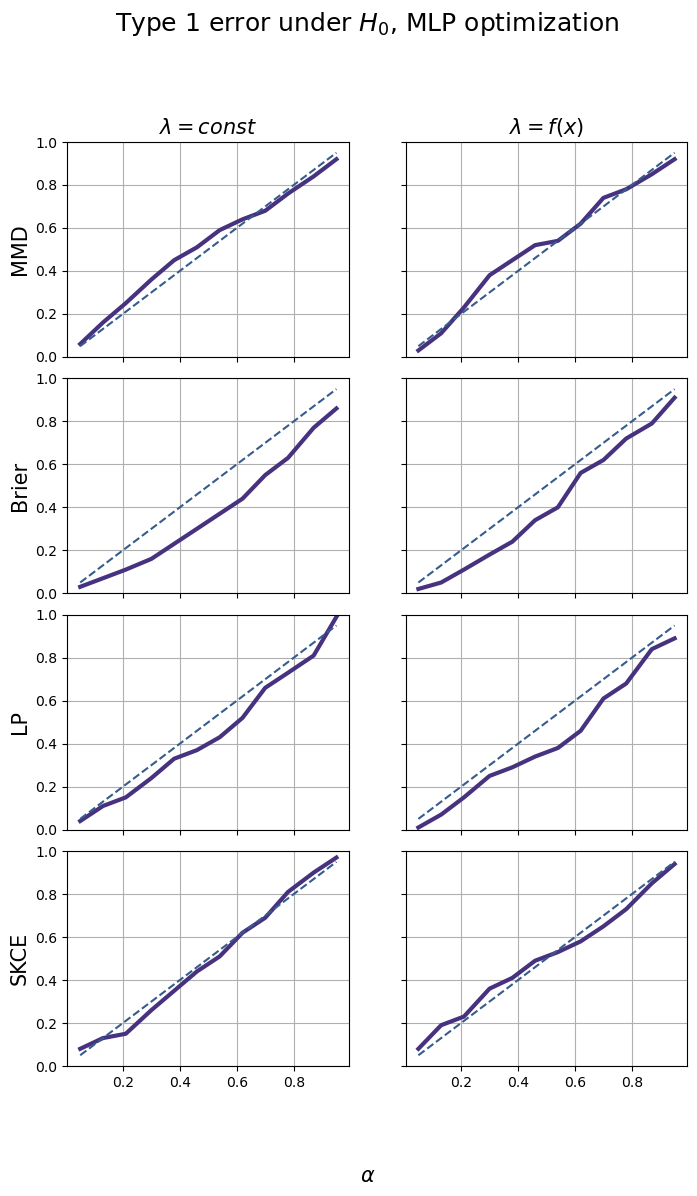

In [27]:
fig_t1_new = plot_error_analysis(
    df = df_results_mlp_new_t1,
    list_errors=df_results_mlp_new_t1.columns,
    list_col_titles=list_col_titles[:2],
    title=r"Type $1$ error under $H_0$, MLP optimization",
)
plt.savefig("../../figures/t1_mlp_new.pdf", bbox_inches="tight")

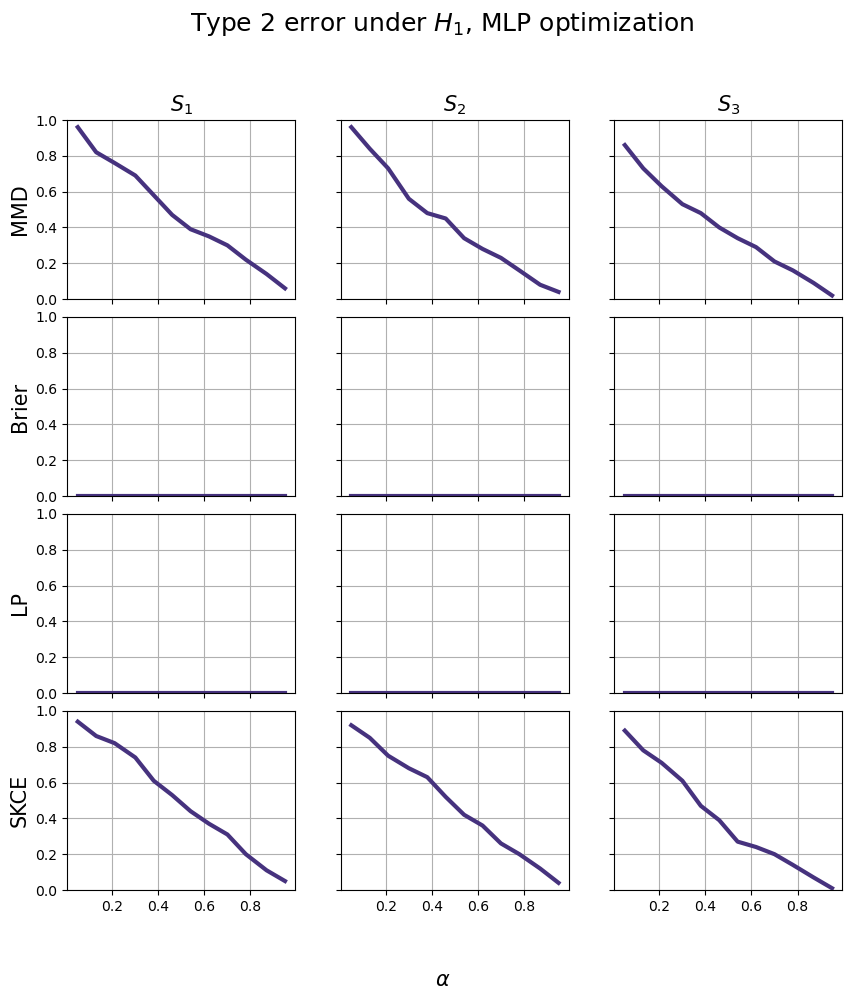

In [25]:
fig_t2_new = plot_error_analysis(
    df = df_results_mlp_new_t2,
    list_errors=df_results_mlp_new_t2.columns,
    figsize=(10, 10),
    list_col_titles=list_col_titles[2:],
    scatter_line=False,
    title=r"Type $2$ error under $H_1$, MLP optimization"
)

plt.savefig("../../figures/t2_mlp_new.pdf", bbox_inches="tight")

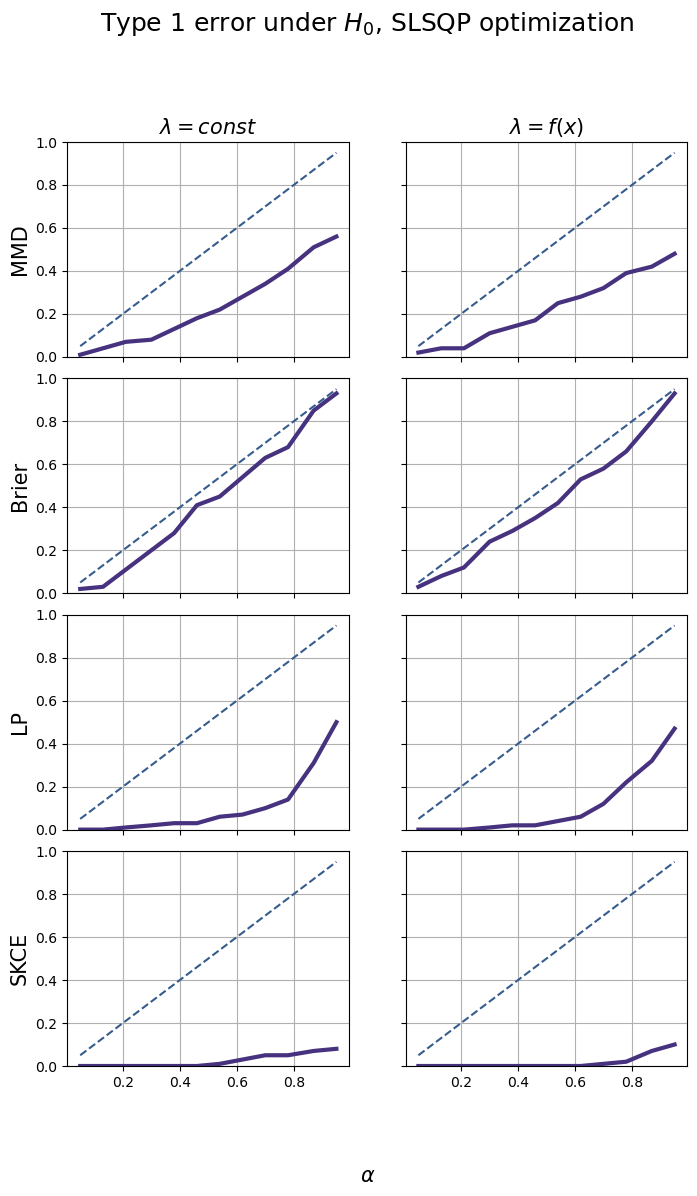

In [28]:
fig_slsqp_10_t1 = plot_error_analysis(
    df = df_results_slsqp_m_10_t1,
    list_errors=df_results_slsqp_m_10_t1.columns,
    list_col_titles=list_col_titles[:2],
    title=r"Type $1$ error under $H_0$, SLSQP optimization",
)

plt.savefig("../../figures/t1_slsqp_m_10.pdf", bbox_inches="tight")

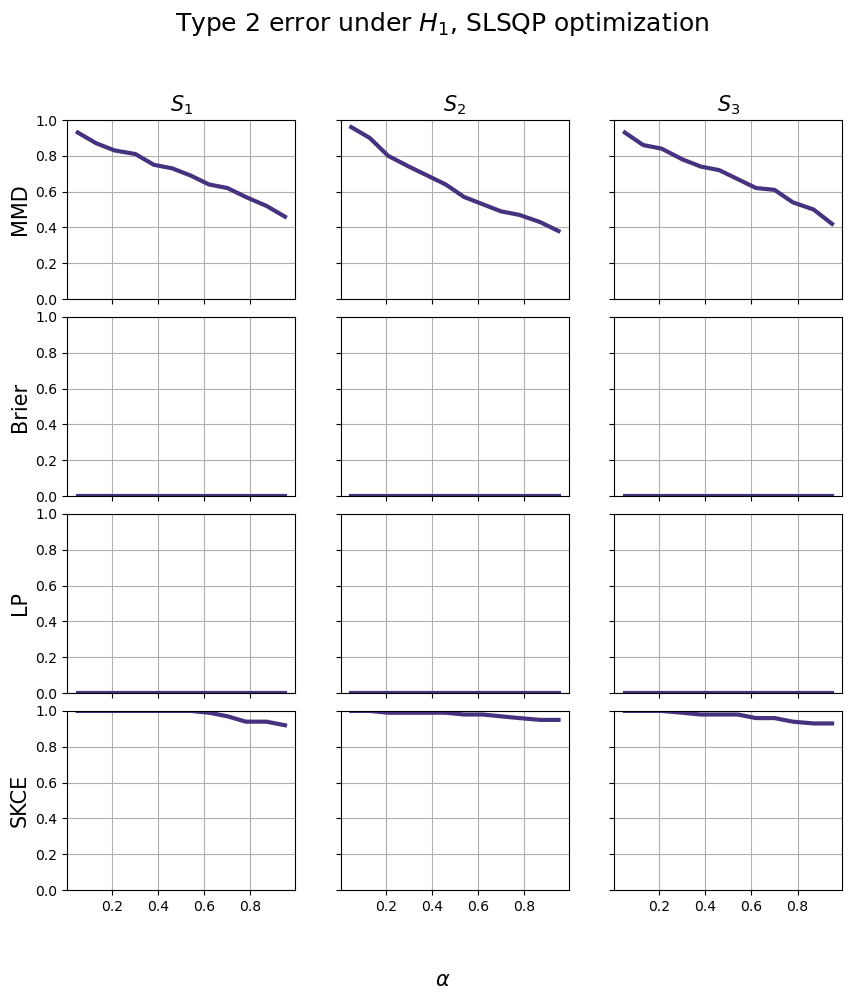

In [30]:
fig_slsqp_10_t2 = plot_error_analysis(
    df = df_results_slsqp_m_10_t2,
    list_errors=df_results_slsqp_m_10_t2.columns,
    figsize=(10, 10),
    list_col_titles=list_col_titles[2:],
    scatter_line=False,
    title=r"Type $2$ error under $H_1$, SLSQP optimization"
)

plt.savefig("../../figures/t2_slsqp_m_10.pdf", bbox_inches="tight")

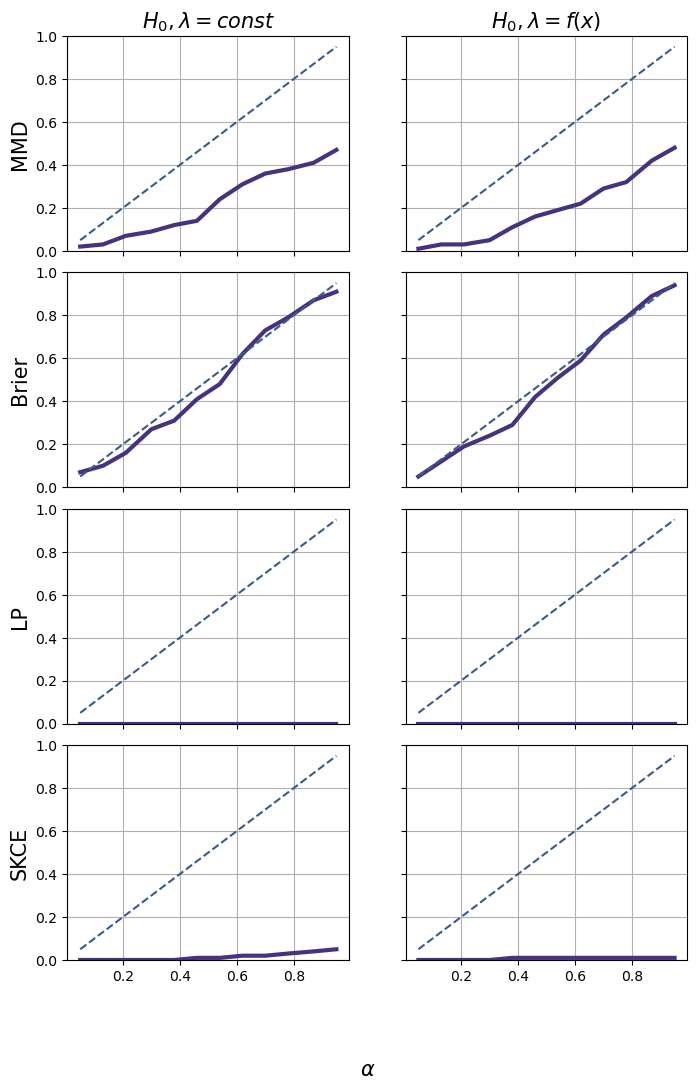

In [9]:
fig_slsqp_new_t1 = plot_error_analysis(
    df = df_results_slsqp_new_t1,
    list_errors=df_results_slsqp_new_t1.columns,
    list_col_titles=list_col_titles[:2],
)

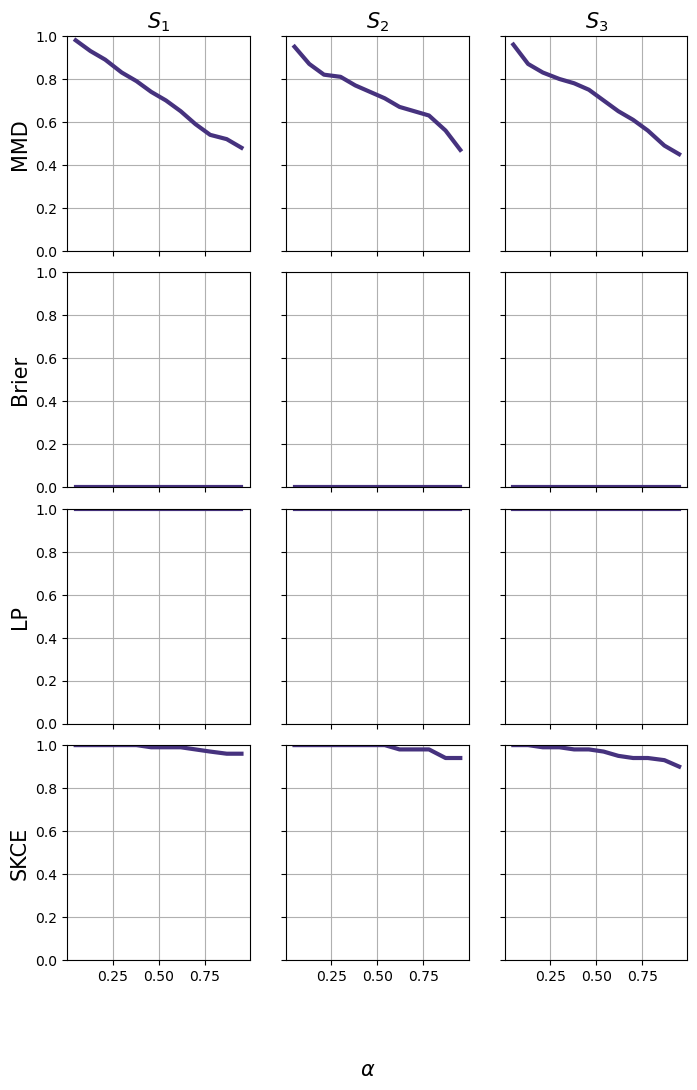

In [10]:
fig_slsqp_t2 = plot_error_analysis(
    df = df_results_slsqp_new_t2,
    list_errors=df_results_slsqp_new_t2.columns,
    list_col_titles=list_col_titles[2:],
    scatter_line=False
)

In [11]:
df_results_slsqp_new_t2

,MMD,Brier,LP,SKCE
2,"[0.98, 0.93, 0.89, 0.83, 0.79, 0.74, 0.7, 0.65...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 0.99, 0...."
3,"[0.95, 0.87, 0.82, 0.81, 0.77, 0.74, 0.71, 0.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98, 0.98..."
4,"[0.96, 0.87, 0.83, 0.8, 0.78, 0.75, 0.7, 0.65,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 0.99, 0.99, 0.98, 0.98, 0.97, 0.95,..."


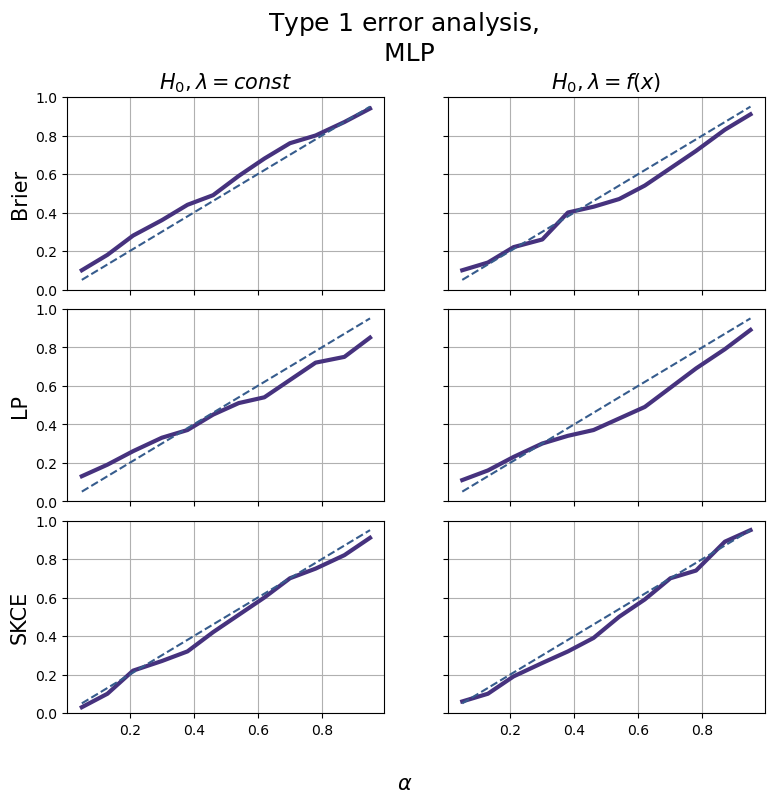

In [12]:
fig_t1 = plot_error_analysis(
    df=df_results_mlp_dirichlet_brier_new_t1,
    list_errors=df_results_mlp_dirichlet_brier_new_t1.columns,
    figsize=(9, 8),
    title="Type $1$ error analysis, \n MLP",
    list_col_titles=list_col_titles[:2],

)
plt.savefig("../../figures/t1_dirichlet_brier_lp_skce_mlp.pdf", bbox_inches="tight", dpi=300)


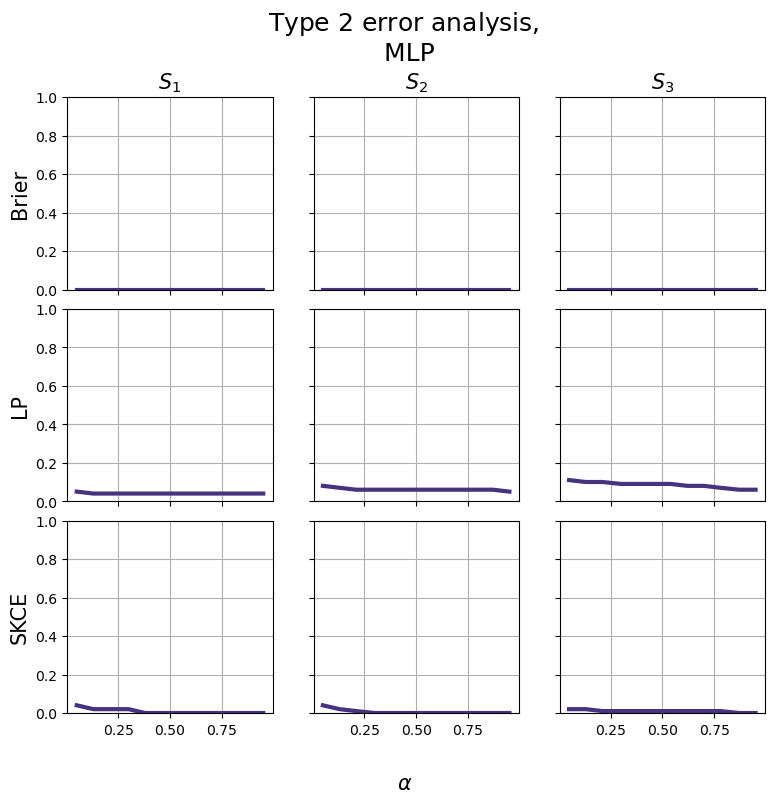

In [13]:
fig_t2 = plot_error_analysis(
    df=df_results_mlp_dirichlet_brier_new_t2,
    list_errors=df_results_mlp_dirichlet_brier_new_t2.columns,
    figsize=(9, 8),
    title="Type $2$ error analysis, \n MLP",
    list_col_titles=list_col_titles[2:],
    scatter_line=False
)

plt.savefig("../../figures/t2_dirichlet_brier_lp_skce_mlp.pdf", bbox_inches="tight", dpi=300)

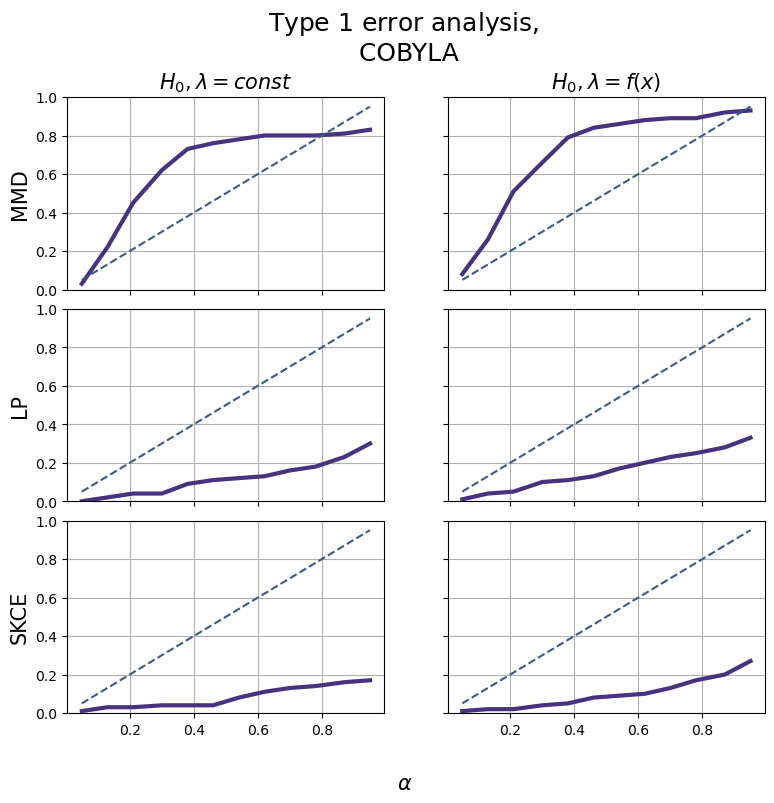

In [14]:
fig_t1_cobyla = plot_error_analysis(
    df=df_results_mlp_cobyla_t1,
    list_errors=df_results_mlp_cobyla_t1.columns,
    figsize=(9, 8),
    title="Type $1$ error analysis, \n COBYLA",
    list_col_titles=list_col_titles[:2],
)

plt.savefig("../../figures/t1_dirichlet_cobyla_mlp.pdf", bbox_inches="tight")

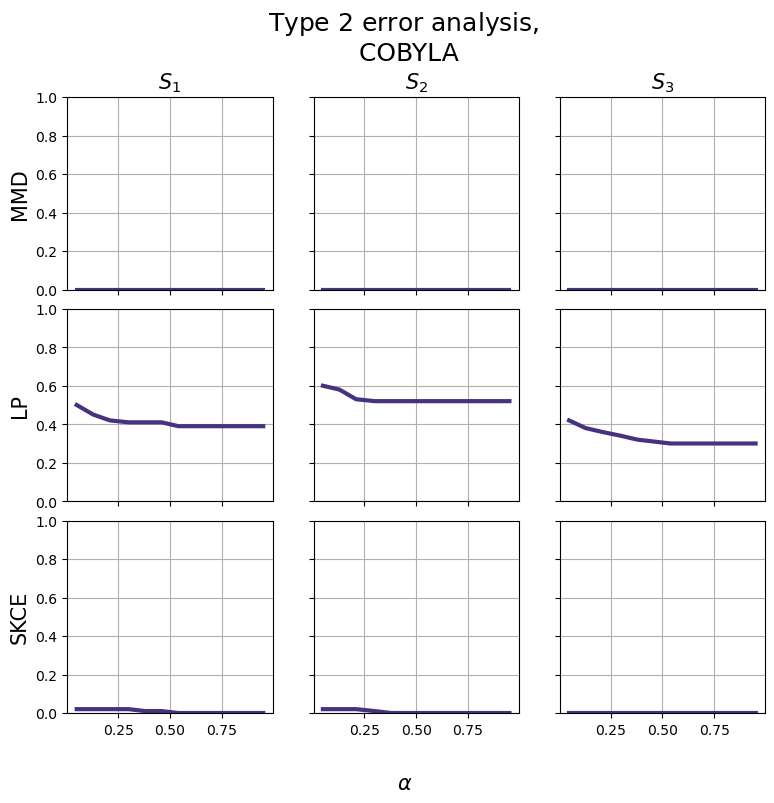

In [15]:
fig_t2_cobyla = plot_error_analysis(
    df=df_results_mlp_cobyla_t2,
    list_errors=df_results_mlp_cobyla_t2.columns,
    figsize=(9, 8),
    title="Type $2$ error analysis, \n COBYLA",
    list_col_titles=list_col_titles[2:],
    scatter_line=False
)

plt.savefig("../../figures/t2_dirichlet_cobyla_mlp.pdf", bbox_inches="tight")

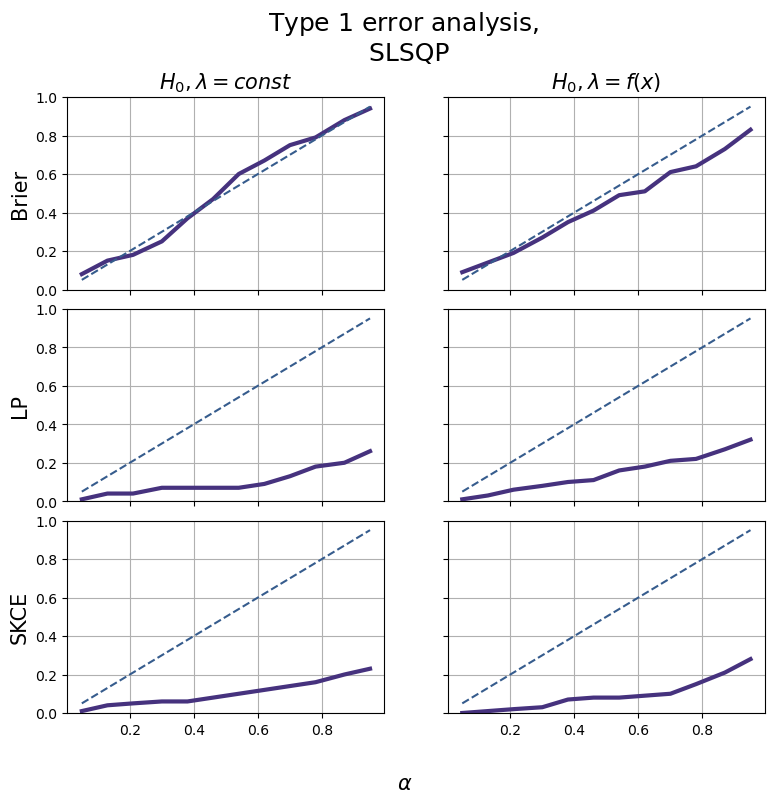

In [16]:
fig_t1_slsqp = plot_error_analysis(
    df=df_results_slsqp_t1,
    list_errors=df_results_slsqp_t1.columns,
    figsize=(9, 8),
    title="Type $1$ error analysis, \n SLSQP",
    list_col_titles=list_col_titles[:2],
)

plt.savefig("../../figures/t1_dirichlet_slsqp.pdf", bbox_inches="tight", dpi=300)

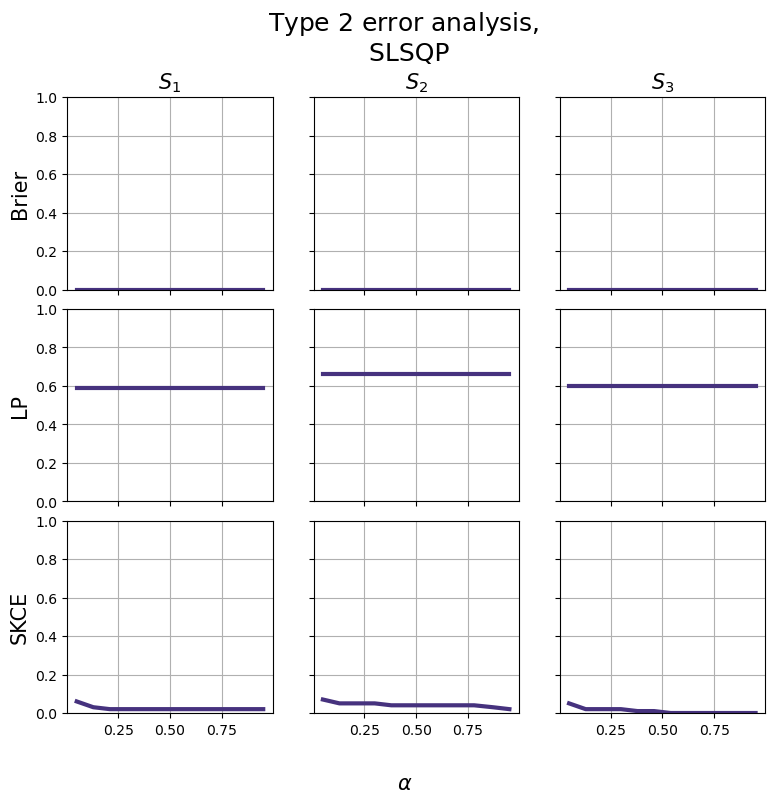

In [17]:
fig_t2_slsqp = plot_error_analysis(
    df=df_results_dirichlet_slsqp_t2,
    list_errors=df_results_dirichlet_slsqp_t2.columns,
    figsize=(9, 8),
    title="Type $2$ error analysis, \n SLSQP",
    list_col_titles=list_col_titles[2:],
    scatter_line=False
)

plt.savefig("../../figures/t2_dirichlet_slsqp.pdf", bbox_inches="tight", dpi=300)

In [43]:
import pandas as pd


In [52]:
p_bar = torch.rand(1000, 10)  # 1000 samples, 10 classes
y = torch.randint(0, 10, (1000,))

In [53]:
# time compute time
%timeit skce_ul_tensor(p_bar, y)
%timeit skce_ul_tensor_v2(p_bar, y)
original_output = skce_ul_tensor(p_bar, y)
optimized_output = skce_ul_tensor_v2(p_bar, y)

print(torch.allclose(original_output, optimized_output, atol=1e-6))

45.4 ms ± 1e+03 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
123 μs ± 11.7 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
True


In [34]:
res = []

for i in range(4):
    res.append([1,2,3])

res
    

[[1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]

In [37]:
# create dataframe of res with transposed rows and columns, list as one entry
df = pd.DataFrame([res], columns=["a", "b", "c", "d"])
df

,a,b,c,d
0,"[1, 2, 3]","[1, 2, 3]","[1, 2, 3]","[1, 2, 3]"


In [39]:
def is_data_encapsulated(data):
    # Check if data is a list
    if isinstance(data, list) and len(data) > 0:
        # Check if the first element is a list
        if isinstance(data[0], list):
            # Check if the elements inside the first element are also lists
            if len(data[0]) > 0 and isinstance(data[0][0], list):
                # Data is encapsulated (list of lists of lists)
                return True
            else:
                # Data is not encapsulated (list of lists)
                return False
    return False 

In [41]:
import pandas as pd

# Your list of lists
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
data_enc = [data, data]

# Optional: Define column names
columns = ['Column1', 'Column2', 'Column3']

if not is_data_encapsulated(data_enc):
    # Encapsulate the data in a list
    data_enc = [data_enc]

# Create the DataFrame with one row
df = pd.DataFrame(data_enc, columns=columns)

print(df)

     Column1    Column2    Column3
0  [1, 2, 3]  [4, 5, 6]  [7, 8, 9]
1  [1, 2, 3]  [4, 5, 6]  [7, 8, 9]
